# **Active Learning: Teaching Machines the Smart Way**


## **Introduction**
Imagine you're teaching a machine to recognize pictures of cats and dogs. To do this, you need to give the machine lots of examples, with labels telling it which picture is of a cat and which is of a dog. This is where supervised learning comes in: the machine learns by looking at these labeled examples. However, labeling pictures is often a time-consuming and expensive process, especially in fields like medicine or self-driving cars, where expert knowledge is needed for accurate labeling.

Active Learning is a special approach that helps machines learn more effectively and efficiently by labeling only the most important or uncertain examples. Instead of labeling every image, active learning asks the machine to choose the examples it's least confident about and requests human input only for those examples. This way, the machine can learn just as well (or better) with fewer labeled examples, saving time and effort.
In this tutorial, we’ll explore the following topics:
  1.	What Active Learning is and why it's useful.
  2.	How Active Learning works: the process and strategies.
  3.	The mathematical foundations behind Active Learning.
  4.	How to implement Active Learning with Python.
  5.	Real-world applications of Active Learning.
By the end of this tutorial, you will have a strong understanding of how Active Learning works and be able to apply it in your own projects.

## **1. What is Active Learning?**
### **Supervised Learning and the Labeling Problem**
In supervised learning, we train a machine by providing it with data that is already labeled. For example:

*   You have a dataset of cat and dog images, and each image is labeled as
either "cat" or "dog".
*  The machine looks at these examples and learns patterns to distinguish between cats and dogs.

However, labeling data requires time, effort, and sometimes expertise. For example, medical images need expert doctors to label them, which is both expensive and slow. Active Learning is a method that minimizes this need by making the learning process more efficient. Instead of labeling all the data, the machine learns which data it’s most unsure about and asks for labels on those specific examples. By focusing only on uncertain examples, the machine can learn with fewer labeled instances.

## **2. How Active Learning Works**
### **Basic Idea**
Active Learning works by choosing the most informative data points—those that the model is unsure about—so that the model can learn the most from them. The process can be broken down into four main steps:
1.	**Initial Training:** First, you train the model on a small set of labeled data.
2.	**Uncertainty Sampling:** After the model is trained, it uses its predictions to identify which examples it’s unsure about.
3.	**Human Querying:** The model then asks a human annotator (oracle) to label these uncertain examples.
4.	**Retraining:** The newly labeled data is added to the training set, and the model is retrained.
This process is repeated until the model performs well or until there is no more uncertainty in the data.

     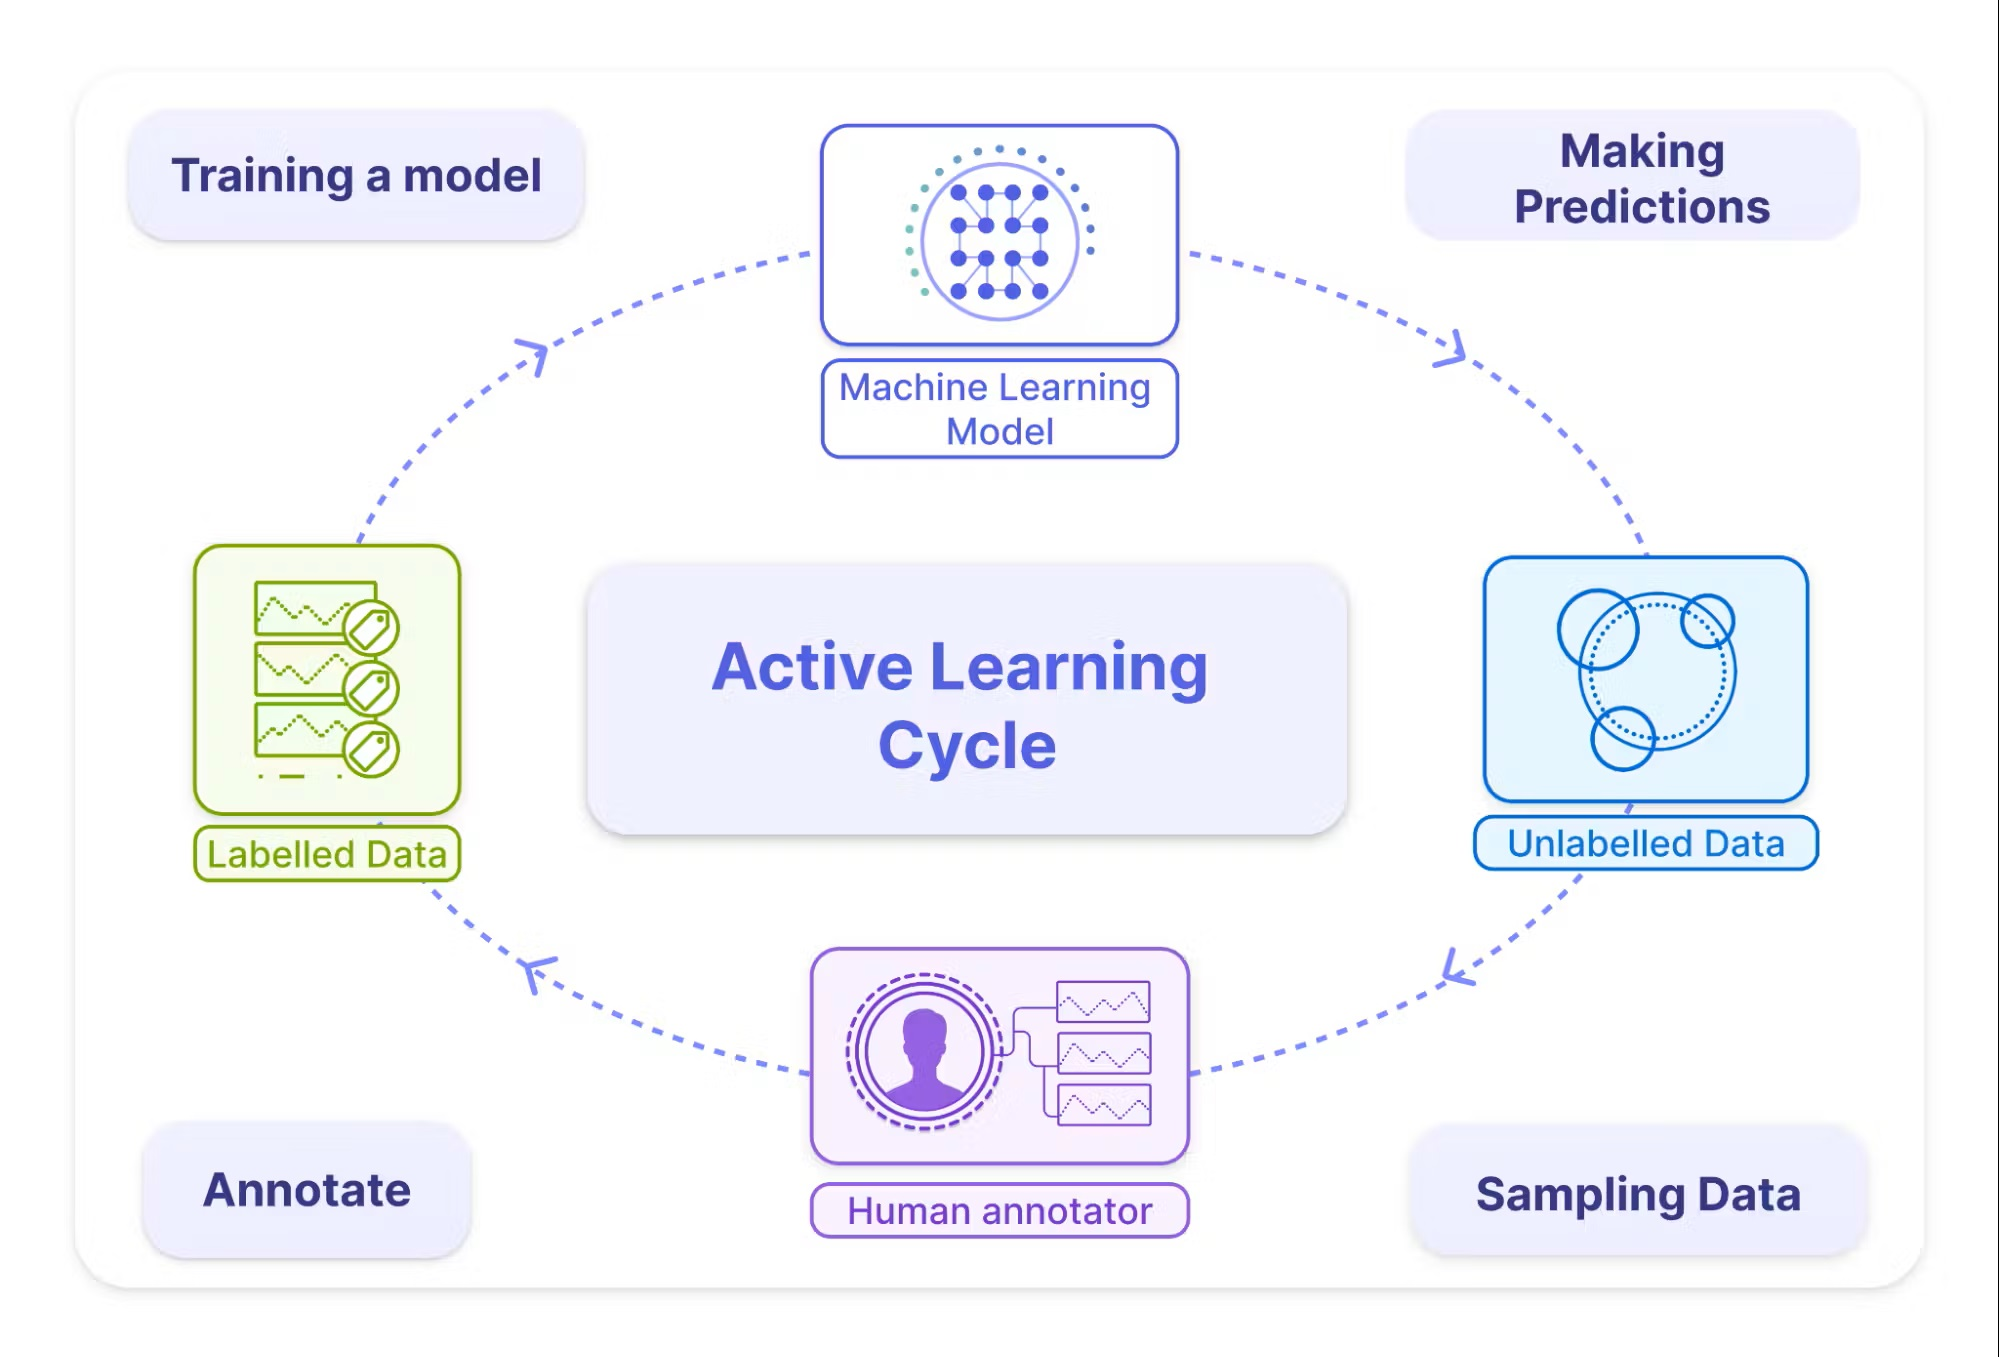


### **Uncertainty Sampling**
The key idea behind Active Learning is that the model will benefit most from labeling the data points that it is most uncertain about. Let’s understand this more clearly.
When a model makes a prediction, it provides some level of confidence. For example, it might say, “I think this image is a dog with 90% confidence and a cat with 10% confidence.” But there are also instances where the model is unsure: for example, it might predict the same probabilities (50% dog, 50% cat). Active Learning identifies these uncertain instances and asks for labels only on these, instead of labeling every example.

### **Querying the Oracle**
In the Active Learning process, the "oracle" refers to the human expert or annotator who provides the correct labels for the uncertain data points selected by the model. For example, if the model is uncertain about a specific image, the oracle would label it as either "cat" or "dog," giving the machine the feedback it needs to learn better.

### **Iterative Process**
The model is retrained after each query round, with the newly labeled data added to the training set. Over time, as the model gets better and more data is labeled, it becomes less uncertain about the data points. The process continues iteratively, refining the model with minimal human intervention.

## **3. Mathematical Foundation of Active Learning**
### **Uncertainty Measurement**
To make decisions about which data points are most uncertain, Active Learning relies on mathematical measures of uncertainty. There are different methods to measure how uncertain a model is, and these often involve probabilities.
### **1. Entropy-based Uncertainty Sampling**
In uncertainty sampling, the model looks for data points where it is most unsure about the class prediction. One way to measure uncertainty is using entropy, which is a measure of randomness or unpredictability.

For a classification problem with two classes (say cat and dog), the entropy \( H \) for a data point with predicted probabilities \( p_1 \) (for the first class) and \( p_2 \) (for the second class) is given by:

$$
H = -p_1 \log(p_1) - p_2 \log(p_2)
$$

- If the model is **very confident** (e.g., \( p_1 = 0.9 \), \( p_2 = 0.1 \)), the entropy is **low**.
- If the model is **uncertain** (e.g., \( p_1 = 0.5 \), \( p_2 = 0.5 \)), the entropy is **high**.
Active learning would focus on those data points where the entropy is high, because the model is uncertain about those.

### **2. Query-by-Committee (QBC)**
In another approach called Query-by-Committee, multiple models are trained using different algorithms or different subsets of the data. The data points where these models disagree the most are considered the most uncertain. The intuition is that if several models disagree, then the data point is ambiguous and labeling it could provide significant benefit to the learning process.
Mathematically, the disagreement can be measured using Kullback-Leibler (KL) Divergence, which measures the difference between two probability distributions P and Q:

$$
D_{KL}(P \parallel Q) = \sum_x P(x) \log\left(\frac{P(x)}{Q(x)}\right)
$$


A high KL divergence between two models indicates that they disagree a lot on a particular instance, and thus that instance is chosen for labeling.

## **4. Strategies in Active Learning**
Active Learning doesn’t just involve uncertainty sampling. There are several strategies for how to select the most informative data points for labeling. Here are some of the common ones:
### **1. Uncertainty Sampling**
This is the most widely used method. In uncertainty sampling, the model chooses the data points where it has the least confidence (highest entropy) in its predictions. For example : A spam detection system predicting:
•	Email A: Spam (95% confidence)
•	Email B: Not Spam (90% confidence)
•	Email C: Spam (50% confidence)
Active Learning will prioritize Email C for labeling, as the model is most uncertain about it.

### **2. Query-by-Committee (QBC)**
QBC involves using multiple models to identify the points where the models disagree the most. These points are selected for labeling because they could potentially improve the model’s learning the most.For example : Three models predict whether an image is a cat or a dog:
•	Model 1: Cat (70%)
•	Model 2: Dog (60%)
•	Model 3: Cat (55%)
Since the models disagree significantly, the image is labeled to resolve the uncertainty.

### **3. Expected Model Change**
In this approach, instead of focusing on uncertainty, the model selects points that will likely cause the largest change in its parameters when labeled. These are the points that the model believes will have the most significant impact on improving its predictions. For example: In a self-driving car scenario, images of rare events (e.g., a dog running onto the road) might cause a significant model update. These examples are prioritized for labeling.
### **4. Density-Weighted Methods**
This method doesn’t just focus on uncertainty but also on how central a point is within the data distribution. If a point is highly uncertain but also very far from the core of the data distribution, it may not be as valuable as a more uncertain point that is central to the distribution. Density-weighted methods help prioritize examples that are both uncertain and representative of the overall data distribution. For Example:
If most of your data points are clustered around a central region, density-weighted methods will prioritize labeling uncertain points within that cluster rather than outliers.




## **5. Implementing Active Learning with Python**

Now, let's take a look at how to implement Active Learning with Python using a simple classification model. Here, we will use uncertainty sampling to train a logistic regression model on the Iris dataset.
### **Step-by-Step Implementation**
#### **Step 1: Load Dataset and Split into Labeled/Unlabeled Sets**
In this step:

We load the Iris dataset, a popular toy dataset for classification. It has 3 classes of flowers.
We split the dataset into two parts:
* A small labeled set for training the model initially.
* A large unlabeled pool that the model will query during Active Learning.

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to set colorblind-friendly styles
def set_plot_style():
    plt.style.use('seaborn-v0_8-muted')  # Muted style for accessibility
    plt.rcParams.update({
        "axes.prop_cycle": plt.cycler("color", ["#0173B2", "#DE8F05", "#029E73", "#D55E00", "#CC78BC"]),
        "axes.facecolor": "white",
        "grid.color": "lightgrey"
    })

# Set the colorblind-friendly style
set_plot_style()

# Load the Iris dataset (simple dataset for demonstration purposes)
iris = load_iris()
X, y = iris.data, iris.target

# Step 1: Split the data into labeled and unlabeled datasets
# A small labeled set and a large unlabeled pool
X_train, X_pool, y_train, y_pool = train_test_split(X, y, test_size=0.9, random_state=42)



#### **Step 2: Train a Logistic Regression Model on the Labeled Data**
Here, we:

* Initialize a Logistic Regression model, a basic classification algorithm.
* Train the model on the small labeled dataset.
* Measure and print the initial accuracy using the remaining pool of data to understand the starting point.


In [6]:
# Step 2: Initialize a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the small labeled dataset
model.fit(X_train, y_train)

# Measure and print initial accuracy
y_pred_initial = model.predict(X_pool)  # Predict on the unlabeled pool
initial_accuracy = accuracy_score(y_pool, y_pred_initial)
print(f"Initial Model Accuracy: {initial_accuracy:.2f}")


Initial Model Accuracy: 0.95


#### **Step 3: Active Learning Loop (Core Logic)**
In this step, we implement Active Learning using entropy-based uncertainty sampling. Here's what happens in each iteration:

* **Predict Probabilities:** The model predicts the class probabilities for the unlabeled pool.
* **Measure Uncertainty:** We calculate entropy, a measure of uncertainty. Higher entropy means the model is less confident about its predictions.
For a classification problem with \( C \) classes, where \( p_i \) is the predicted probability for class \( i \), the entropy \( H \) is calculated as:

$$
H = -\sum_{i=1}^C p_i \log(p_i)
$$

* **Select Most Uncertain Points:** The top 10 uncertain points are chosen to be labeled.
* **Update the Training Set:**
Add these selected points to the labeled training set.
Remove them from the unlabeled pool.
* **Retrain the Model:** The model is retrained using the updated labeled dataset.
* **Repeat:** This process continues for 5 iterations.

At the end of this loop, the model has learned from the most uncertain points, improving its performance efficiently.


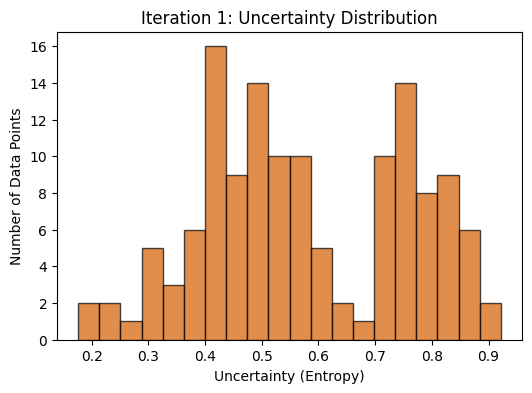

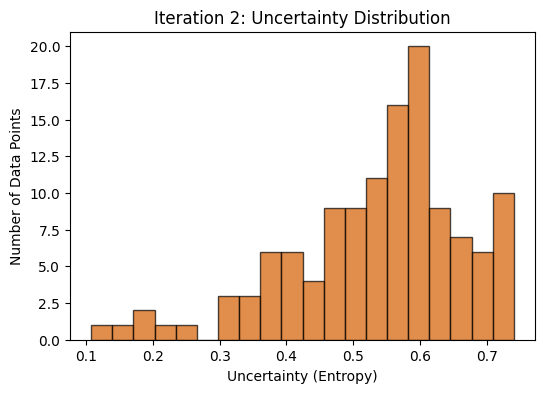

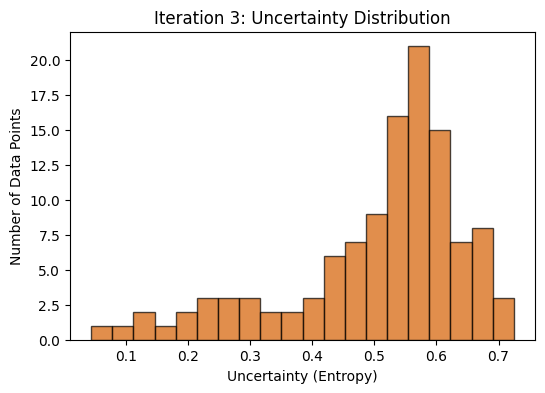

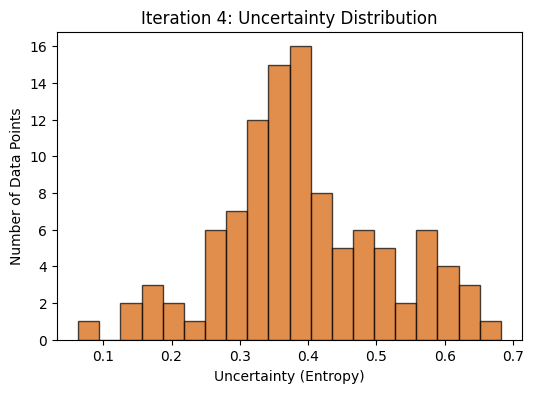

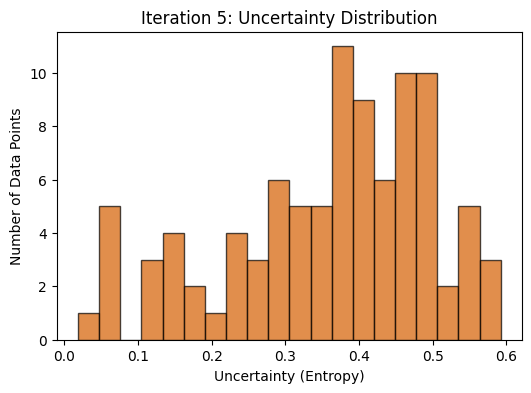

In [7]:
# Step 3: Active Learning Loop
accuracy_over_iterations = []

for iteration in range(5):  # Repeat for 5 iterations
    # Step 3.1: Predict probabilities for the unlabeled pool
    probas = model.predict_proba(X_pool)

    # Step 3.2: Calculate uncertainty using entropy
    uncertainties = -np.sum(probas * np.log(probas + 1e-9), axis=1)  # Adding 1e-9 to avoid log(0)

    # Step 3.3: Select the 10 most uncertain points
    query_indices = np.argsort(uncertainties)[-10:]

    # Step 3.4: Add uncertain points to the training set
    X_train = np.vstack((X_train, X_pool[query_indices]))
    y_train = np.concatenate((y_train, y_pool[query_indices]))

    # Step 3.5: Remove these points from the unlabeled pool
    X_pool = np.delete(X_pool, query_indices, axis=0)
    y_pool = np.delete(y_pool, query_indices)

    # Step 3.6: Retrain the model with the updated labeled dataset
    model.fit(X_train, y_train)

    # Evaluate the model and save accuracy
    y_pred = model.predict(X_pool)
    accuracy = accuracy_score(y_pool, y_pred)
    accuracy_over_iterations.append(accuracy)

    # Plot the uncertainty distribution (optional, one per iteration)
    plt.figure(figsize=(6, 4))
    plt.hist(uncertainties, bins=20, color="#D55E00", alpha=0.7, edgecolor="black")
    plt.xlabel("Uncertainty (Entropy)")
    plt.ylabel("Number of Data Points")
    plt.title(f"Iteration {iteration+1}: Uncertainty Distribution")
    plt.show()


#### **Step 4: Evaluate Final Accuracy**

Here, we evaluate the model’s accuracy on the remaining unlabeled data after completing all Active Learning iterations. This helps us compare the final accuracy with the initial accuracy.


In [8]:
# Step 4: Evaluate final accuracy
y_pred_final = model.predict(X_pool)
final_accuracy = accuracy_score(y_pool, y_pred_final)
print(f"Final Model Accuracy: {final_accuracy:.2f}")


Final Model Accuracy: 1.00


### **Step 5: Plot Accuracy Improvement Over Iterations**
We visualize how the model’s accuracy improves over the iterations. This plot demonstrates the effectiveness of Active Learning.

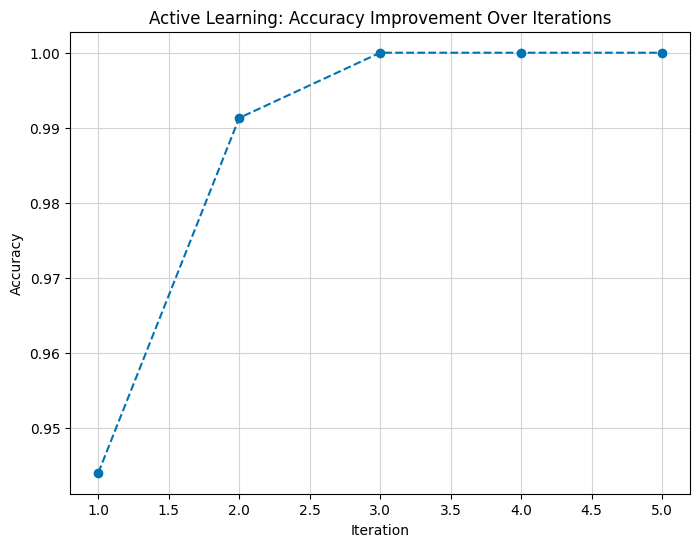

In [9]:

# Step 5: Plot Accuracy Improvement Over Iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), accuracy_over_iterations, marker='o', linestyle='--', color="#0173B2")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Active Learning: Accuracy Improvement Over Iterations")
plt.grid()
plt.show()

## **6. Real-World Applications of Active Learning**
Active Learning has proven useful in many fields, especially when labeling data is expensive or time-consuming:


*   **Medical Imaging:** In radiology, labeling medical images requires expert doctors. Active Learning helps reduce the number of images doctors need to label, improving efficiency.
*   **Self-Driving Cars:** Self-driving vehicles need large datasets to recognize objects like pedestrians, traffic lights, and road signs. Active Learning helps optimize the labeling process.
*  **Natural Language Processing (NLP):** In tasks like sentiment analysis and text classification, Active Learning can reduce the number of labeled sentences required, saving time.


## **Conclusion**

Active Learning is a powerful tool for efficiently training machine learning models with fewer labeled examples. By focusing on the most uncertain data points, Active Learning makes the learning process smarter and more efficient. This tutorial covered the key concepts of Active Learning, its mathematical foundations, strategies, and a simple implementation in Python. Active Learning has broad applications in fields like medical imaging, autonomous vehicles, and natural language processing, where labeling data is often costly.

## References
1. ML | Active Learning (https://www.geeksforgeeks.org/ml-active-learning/)
2. Neptune Blog: Active Learning: Strategies, Tools, and Real-World Use Cases (https://neptune.ai/blog/active-learning-strategies-tools-use-cases)
3. Encord Blog: Active Learning in Machine Learning: Guide & Strategies. (https://neptune.ai/blog/active-learning-strategies-tools-use-cases)


## GitHub Repository (https://github.com/DivyaAntonyThazhekkadan/Machine-Learning-Tutorial-Assignment)